In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x_data = np.array([[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])
y_data = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1]
])

model = Sequential()
model.add(Dense(input_dim=2, units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

print("=====================initial weights====================")
for weight in model.weights:
  print(weight)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01)
,loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
history = model.fit(x_data, y_data, epochs=100, batch_size=1)

print("=====================weights============================")
for weight in model.weights:
  print(weight)

print("=====================test results=========================")
print(x_data)
print(model.predict(x_data))
print("\n Accuracy: %.4f" % (model.evaluate(x_data, y_data)[1]))

print("==========================================================")

=====================initial weights====================
<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.05515587,  0.11420399,  0.22611803,  0.5805662 ,  0.13102579,
        -0.63123   , -0.3314686 , -0.21694398,  0.20641607, -0.5076706 ],
       [-0.21263018, -0.62643385,  0.49731964, -0.57771766,  0.2830714 ,
         0.2985285 ,  0.5753328 ,  0.2475524 ,  0.40352374, -0.56102157]],
      dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
<tf.Variable 'dense_3/kernel:0' shape=(10, 5) dtype=float32, numpy=
array([[-0.25318223, -0.52275866,  0.26928848,  0.57732385,  0.12488526],
       [ 0.46767932, -0.2630369 , -0.01780999,  0.27719808, -0.62773585],
       [-0.37259033, -0.564595  , -0.3226503 ,  0.22278768, -0.13049757],
       [ 0.4431185 ,  0.414555  , -0.54534566, -0.06851375,  0.09186816],
       [-0.17446047,  0.3270564 ,  0.22226518,  0.41363007, -0.3628

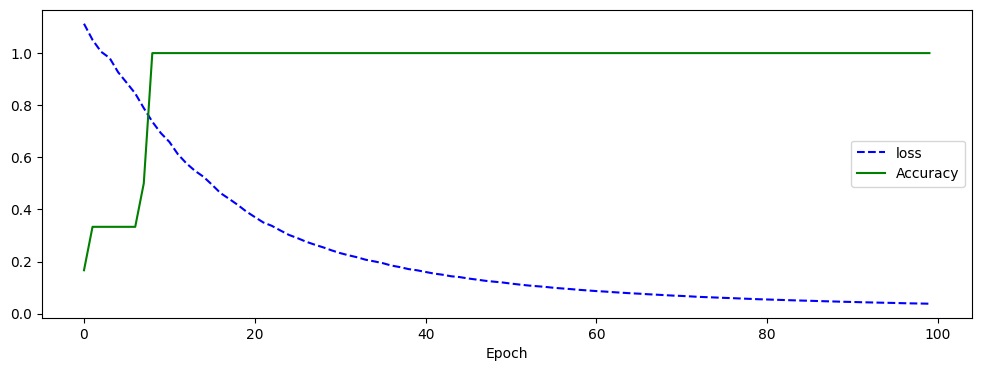

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g-', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()